In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [12]:
df = pd.read_csv("D:\Soft_Resources\Electricity Theft Detection using deep learning\data.csv")

In [13]:
df.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42372 entries, 0 to 42371
Columns: 1036 entries, CONS_NO to 2016/9/9
dtypes: float64(1034), int64(1), object(1)
memory usage: 334.9+ MB


In [15]:
df.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,25870.000000,25912.000000,25911.000000,25912.00000,25912.000000,25912.000000,25915.000000,25924.000000,25925.000000,...,40544.000000,41482.000000,41915.000000,41151.000000,41906.000000,41873.000000,41850.000000,41967.000000,42044.000000,42027.00000
mean,0.085316,7.168735,6.954202,6.784099,7.08430,10.516470,7.219633,7.341512,7.160004,6.839875,...,8.836129,9.304656,10.758718,9.942215,11.173498,11.482926,11.656425,11.322680,11.015589,10.69165
std,0.279354,34.131237,40.017856,38.327058,31.98716,576.388348,34.703617,36.569049,36.916957,30.235396,...,52.371956,57.063621,88.039832,62.010381,94.267851,100.971180,118.369381,103.891111,100.614909,107.25814
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.660000,0.820000,0.880000,0.880000,0.900000,0.920000,0.940000,0.910000,0.910000,0.90000
50%,0.000000,3.310000,2.870000,2.900000,3.35000,3.440000,3.295000,3.470000,3.130000,3.250000,...,4.380000,4.670000,5.010000,4.820000,5.150000,5.110000,5.190000,5.110000,5.020000,4.93000
75%,0.000000,8.910000,8.170000,8.210000,8.76000,8.620000,8.740000,8.900000,8.780000,8.520000,...,9.300000,9.380000,10.740000,9.700000,11.380000,11.430000,11.600000,11.300000,10.730000,10.28000
max,1.000000,3318.000000,3966.000000,4392.000000,3414.00000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.00000


In [16]:
#no rows on the dataframe with all values as nan
df[df.isnull().all(axis=1)==True]

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9


In [17]:
#number of missing values and corresponding number of rows with that number of missing values
df.isnull().sum(axis=1).value_counts()

730    5378
1      1485
5      1370
3      1081
732     927
       ... 
634       1
992       1
788       1
850       1
687       1
Length: 915, dtype: int64

In [18]:
data = df.drop(['CONS_NO', 'FLAG'],axis = 1)
data.columns = pd.to_datetime(data.columns)
data = data.reindex(sorted(data.columns), axis=1)
data.columns = [dt.strftime('%Y/%m/%d') for dt in data.columns]

In [19]:
#dropping rows with over 700 empty values
data = data[(data.isnull().sum(axis=1)<700)==True]
data

,2014/01/01,2014/01/02,2014/01/03,2014/01/04,2014/01/05,2014/01/06,2014/01/07,2014/01/08,2014/01/09,2014/01/10,...,2016/10/22,2016/10/23,2016/10/24,2016/10/25,2016/10/26,2016/10/27,2016/10/28,2016/10/29,2016/10/30,2016/10/31
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
6,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,...,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
7,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,...,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.59,0.95,0.39,0.86,0.60,0.82,0.65,0.53,0.77,0.56
42367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
42368,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,4.39,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,0.84,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65


COMPUTING THE MISSING VALUES

In [20]:
def isValidPos(i,j):
    if (j-5<0) | (j+5>1033):
        return 0
    return 1

In [21]:
def local_avg(i,j):
    if isValidPos(i,j):
        if np.isnan(np.mean(data.iloc[i,j-1:j+1].values)):
            return 0
        else:
            return np.mean(data.iloc[i,j-5:j+5].values)

In [22]:
for i in range(data.shape[0]):
    for j in range(1034):
        if (j<=4) & (np.isnan(data.iloc[i,j])):
            if np.isnan(np.mean(data.iloc[i,0:j+5].values)):
                data.iloc[i,j] = 0
            else:
                data.iloc[i,j] = np.mean(data.iloc[i,0:j+5].values)
        elif (j>=1029) & (np.isnan(data.iloc[i,j])):            
            if np.isnan(np.mean(data.iloc[i,j:1033].values)):
                data.iloc[i,j] = 0
            else:
                data.iloc[i,j] = np.mean(data.iloc[i,j:1033].values)
        elif np.isnan(data.iloc[i,j]):    
            data.iloc[i,j] = local_avg(i,j)
        else:
            continue

print("Computed Missing Values...")

C:\Users\devan\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\devan\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Computed Missing Values...


In [32]:
data.isnull().sum(axis=1).value_counts().sort_index()

0    32746
dtype: int64

REMOVING OUTLIERS

In [33]:
for i in range(data.shape[0]):
    x = data.iloc[i]
    for j in range(data.shape[1]):
        if x[j] > (x.mean() + 2*x.std()):
            x[j] = x.mean() + 2*x.std()
        else:
            continue  
print("Outliers removed...")

Outliers removed...


In [38]:
data

,2014/01/01,2014/01/02,2014/01/03,2014/01/04,2014/01/05,2014/01/06,2014/01/07,2014/01/08,2014/01/09,2014/01/10,...,2016/10/22,2016/10/23,2016/10/24,2016/10/25,2016/10/26,2016/10/27,2016/10/28,2016/10/29,2016/10/30,2016/10/31
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
6,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,...,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
7,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,...,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42366,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.59,0.95,0.39,0.86,0.60,0.82,0.65,0.53,0.77,0.56
42367,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
42368,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,5.68,4.39,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,1.23,0.84,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65


In [39]:
data_pp = pd.concat([df[(df.isnull().sum(axis=1)<700)==True][['CONS_NO', 'FLAG']], data], axis=1)

In [40]:
data_pp

,CONS_NO,FLAG,2014/01/01,2014/01/02,2014/01/03,2014/01/04,2014/01/05,2014/01/06,2014/01/07,2014/01/08,...,2016/10/22,2016/10/23,2016/10/24,2016/10/25,2016/10/26,2016/10/27,2016/10/28,2016/10/29,2016/10/30,2016/10/31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
6,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,...,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
7,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,...,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42366,5FCE503B6B616D5023B3C46173383107,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.59,0.95,0.39,0.86,0.60,0.82,0.65,0.53,0.77,0.56
42367,F1472871E1AFF49D4289564B6377D76C,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65


In [41]:
data_pp["FLAG"].value_counts()

0    30083
1     2663
Name: FLAG, dtype: int64

In [42]:
data_pp.to_csv("Preprocessed_Consumer_Data.csv")

In [3]:
data_pp = pd.read_csv("Preprocessed_Consumer_Data.csv")

In [43]:
data_pp

,CONS_NO,FLAG,2014/01/01,2014/01/02,2014/01/03,2014/01/04,2014/01/05,2014/01/06,2014/01/07,2014/01/08,...,2016/10/22,2016/10/23,2016/10/24,2016/10/25,2016/10/26,2016/10/27,2016/10/28,2016/10/29,2016/10/30,2016/10/31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
6,34C1954AA3703C4F8BD8EAEA7C4B7B83,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,...,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
7,768309B0EB11FD436CEE5ABFB84F4C0C,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,...,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42366,5FCE503B6B616D5023B3C46173383107,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.59,0.95,0.39,0.86,0.60,0.82,0.65,0.53,0.77,0.56
42367,F1472871E1AFF49D4289564B6377D76C,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65


In [63]:
#4 weeks data of a normal customer and a fraudulent cutomer
a=2790
b=33
norm_data = pd.DataFrame(columns=["Day","Week1","Week2","Week3","Week4"])
norm_data["Day"] = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
norm_data["Week1"] = data_pp.loc[a,"2015/01/05":"2015/01/11"].values
norm_data["Week2"] = data_pp.loc[a,"2015/01/12":"2015/01/18"].values
norm_data["Week3"] = data_pp.loc[a,"2015/01/19":"2015/01/25"].values
norm_data["Week4"] = data_pp.loc[a,"2015/01/26":"2015/02/01"].values

fraud_data = pd.DataFrame(columns=["Day","Week1","Week2","Week3","Week4"])
fraud_data["Day"] = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
fraud_data["Week1"] = data_pp.loc[b,"2015/01/05":"2015/01/11"].values
fraud_data["Week2"] = data_pp.loc[b,"2015/01/12":"2015/01/18"].values
fraud_data["Week3"] = data_pp.loc[b,"2015/01/19":"2015/01/25"].values
fraud_data["Week4"] = data_pp.loc[b,"2015/01/26":"2015/02/01"].values
norm_data

,Day,Week1,Week2,Week3,Week4
0,Monday,11.02,10.66,9.93,11.36
1,Tuesday,9.67,14.96,10.87,11.5
2,Wednesday,11.06,11.18,9.36,9.08
3,Thursday,9.58,9.44,9.63,8.85
4,Friday,9.73,9.46,10.12,10.53
5,Saturday,8.9,0.0,7.91,8.77
6,Sunday,12.74,0.0,13.0,6.79


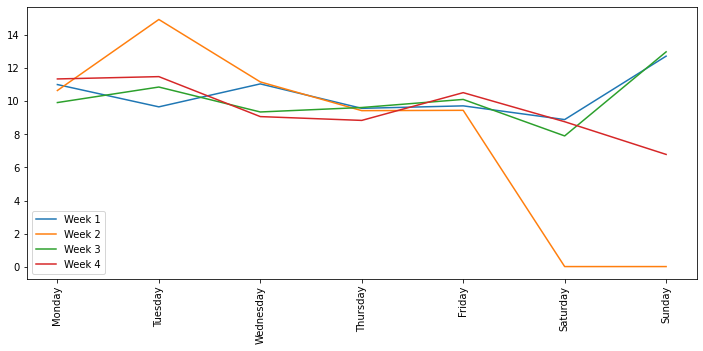

In [64]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.plot(norm_data["Day"],norm_data["Week1"], label = "Week 1")
plt.plot(norm_data["Day"],norm_data["Week2"], label = "Week 2")
plt.plot(norm_data["Day"],norm_data["Week3"], label = "Week 3")
plt.plot(norm_data["Day"],norm_data["Week4"], label = "Week 4")

plt.legend()


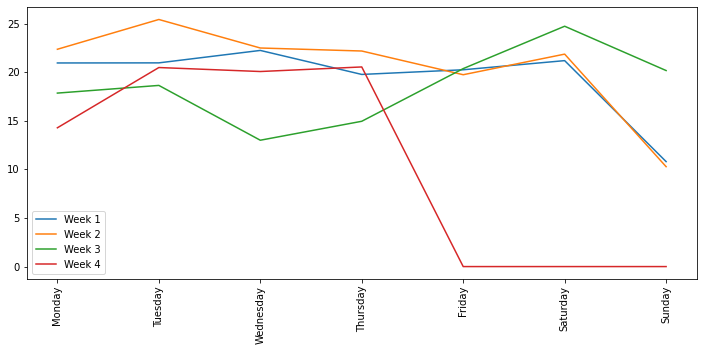

In [65]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.plot(fraud_data["Day"],fraud_data["Week1"], label = "Week 1")
plt.plot(fraud_data["Day"],fraud_data["Week2"], label = "Week 2")
plt.plot(fraud_data["Day"],fraud_data["Week3"], label = "Week 3")
plt.plot(fraud_data["Day"],fraud_data["Week4"], label = "Week 4")

plt.legend()

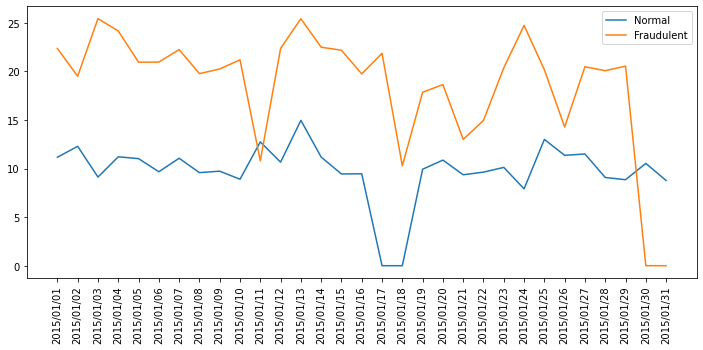

In [66]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
plt.plot(data_pp.loc[a,"2015/01/01":"2015/01/31"].index,data_pp.loc[a,"2015/01/01":"2015/01/31"].values, label = "Normal")
plt.plot(data_pp.loc[b,"2015/01/01":"2015/01/31"].index,data_pp.loc[b,"2015/01/01":"2015/01/31"].values, label = "Fraudulent")
plt.legend()


ADASYN METHOD FOR OVERSAMPLING OF IMBALANCED DATASET

In [67]:
from sklearn import neighbors

seed = 10
np.random.seed(seed)


class MinMaxNormalization:

    """
    Min-Max Normalization.  Was using in conjunction of ADASYN to test results
        data:  Data to be normalized
        axis:  0 is by columns, 1 is by rows
     returns:  Normalized data
    """

    def __init__(self, data, axis=0):
        self.row_min = np.min(data, axis=axis)
        self.row_max = np.max(data, axis=axis)
        self.denominator = abs(self.row_max - self.row_min)

        # Fix divide by zero, replace value with 1 because these usually happen for boolean columns
        for index, value in enumerate(self.denominator):
            if value == 0:
                self.denominator[index] = 1

    def __call__(self, data):
        return np.divide((data - self.row_min), self.denominator)


def adasyn(X, y, beta, K, threshold=1):

    """
    Adaptively generating minority data samples according to their distributions.
    More synthetic data is generated for minority class samples that are harder to learn.
    Harder to learn data is defined as positive examples with not many examples for in their respective neighbourhood.
    Inputs
         -----
         X:  Input features, X, sorted by the minority examples on top.  Minority example should also be labeled as 1
         y:  Labels, with minority example labeled as 1
      beta:  Degree of imbalance desired.  Neg:Pos. A 1 means the positive and negative examples are perfectly balanced.
         K:  Amount of neighbours to look at
 threshold:  Amount of imbalance rebalance required for algorithm
    Variables
         -----
         xi:  Minority example
        xzi:  A minority example inside the neighbourhood of xi
         ms:  Amount of data in minority class
         ml:  Amount of data in majority class
        clf:  k-NN classifier model
          d:  Ratio of minority : majority
       beta:  Degree of imbalance desired
          G:  Amount of data to generate
         Ri:  Ratio of majority data / neighbourhood size.  Larger ratio means the neighbourhood is harder to learn,
              thus generating more data.
     Minority_per_xi:  All the minority data's index by neighbourhood
     Rhat_i:  Normalized Ri, where sum = 1
         Gi:  Amount of data to generate per neighbourhood (indexed by neighbourhoods corresponding to xi)
    Returns
         -----
  syn_data:  New synthetic minority data created
    """

    ms = int(sum(y))
    ml = len(y) - ms

    clf = neighbors.KNeighborsClassifier()
    clf.fit(X, y)

    # Step 1, calculate the degree of class imbalance.  If degree of class imbalance is violated, continue.
    d = np.divide(ms, ml)

    if d > threshold:
        return print("The data set is not imbalanced enough.")

    # Step 2a, if the minority data set is below the maximum tolerated threshold, generate data.
    # Beta is the desired balance level parameter.  Beta > 1 means u want more of the imbalanced type, vice versa.
    G = (ml - ms) * beta

    # Step 2b, find the K nearest neighbours of each minority class example in euclidean distance.
    # Find the ratio ri = majority_class in neighbourhood / K
    Ri = []
    Minority_per_xi = []
    for i in range(ms):
        xi = X[i, :].reshape(1, -1)
        # Returns indices of the closest neighbours, and return it as a list
        neighbours = clf.kneighbors(xi, n_neighbors=K, return_distance=False)[0]
        # Skip classifying itself as one of its own neighbours
        # neighbours = neighbours[1:]

        # Count how many belongs to the majority class
        count = 0
        for value in neighbours:
            if value > ms:
                count += 1

        Ri.append(count / K)

        # Find all the minority examples
        minority = []
        for value in neighbours:
            # Shifted back 1 because indices start at 0
            if value <= ms - 1:
                minority.append(value)

        Minority_per_xi.append(minority)

    # Step 2c, normalize ri's so their sum equals to 1
    Rhat_i = []
    for ri in Ri:
        rhat_i = ri / sum(Ri)
        Rhat_i.append(rhat_i)

    assert(sum(Rhat_i) > 0.99)

    # Step 2d, calculate the number of synthetic data examples that will be generated for each minority example
    Gi = []
    for rhat_i in Rhat_i:
        gi = round(rhat_i * G)
        Gi.append(int(gi))

    # # Step 2e, generate synthetic examples
    syn_data = []
    for i in range(ms):
        xi = X[i, :].reshape(1, -1)
        for j in range(Gi[i]):
            # If the minority list is not empty
            if Minority_per_xi[i]:
                index = np.random.choice(Minority_per_xi[i])
                xzi = X[index, :].reshape(1, -1)
                si = xi + (xzi - xi) * np.random.uniform(0, 1)
                syn_data.append(si)

    # Test the new generated data
    test = []
    for values in syn_data:
        a = clf.predict(values)
        test.append(a)

    print("Using the old classifier, {} out of {} would be classified as minority.".format(np.sum(test), len(syn_data)))

    # Build the data matrix
    data = []
    for values in syn_data:
        data.append(values[0])

    print("{} amount of minority class samples generated".format(len(data)))

    # Concatenate the positive labels with the newly made data
    labels = np.ones([len(data), 1])
    data = np.concatenate([labels, data], axis=1)

    # Concatenate with old data
    org_data = np.concatenate([y.reshape(-1, 1), X], axis=1)
    data = np.concatenate([data, org_data])

    return data, Minority_per_xi, Ri


if __name__ == "__main__":
    # Ubuntu 18.04
    # path = '/home/rui/Documents/logistic_regression_tf/'

    df1 = data_pp
    df1.reset_index(drop=True, inplace=True)

    X = df1.drop(['CONS_NO', 'FLAG'], axis = 1).values
    X = X.astype('float32')
    y = df1.iloc[:, 1].values

    Syn_data, neighbourhoods, Ri = adasyn(X, y, beta=0.1, K=15, threshold=1)
    np.savetxt('Synthetic_data.csv', Syn_data, delimiter=',')

Using the old classifier, 518 out of 2466 would be classified as minority.
2466 amount of minority class samples generated


In [69]:
df_new = pd.read_csv("Synthetic_data.csv")

In [70]:
df_new.iloc[:,0].value_counts()

0.0    30083
1.0     5128
Name: 1.000000000000000000e+00, dtype: int64

In [71]:
df_new.columns = data_pp.drop(["CONS_NO"],axis=1).columns
df_new.head()

,FLAG,2014/01/01,2014/01/02,2014/01/03,2014/01/04,2014/01/05,2014/01/06,2014/01/07,2014/01/08,2014/01/09,...,2016/10/22,2016/10/23,2016/10/24,2016/10/25,2016/10/26,2016/10/27,2016/10/28,2016/10/29,2016/10/30,2016/10/31
0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.662580,19.004263,15.542813,16.823618,18.493790,18.249071,16.346870,18.537642,12.926571,12.987297
1,1.0,1.627176,1.630187,1.857107,1.448199,1.721561,4.002304,3.656834,3.255725,3.322022,...,10.241782,9.770768,8.777807,6.592509,11.141382,8.942884,10.073968,11.938208,8.562219,7.047858
2,1.0,0.110000,0.110000,0.250000,0.270000,0.210000,0.200000,0.140000,0.340000,0.230000,...,1.850000,3.360000,1.450000,2.120000,1.550000,1.180000,1.130000,1.340000,1.260000,1.400000
3,1.0,1.046663,1.205554,0.952024,1.359419,0.922218,1.084586,0.931206,1.293186,1.271012,...,3.548019,3.507191,3.032271,3.940291,3.087094,3.818019,2.823283,3.031303,3.820528,2.993186
4,1.0,11.020000,7.920000,8.410000,9.660000,9.860000,8.320000,8.210000,7.880000,10.170000,...,64.110001,84.889999,60.860001,52.669998,49.430000,57.220001,56.680000,45.279999,44.040001,43.360001


In [72]:
df_new.to_csv("Synthetic_Consumer_Data.csv")

CNN LSTM MODEL